In [46]:
import import_ipynb

# IMPORT NECESSARY MODULES
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = "/Users/ramonjr.comendador/cs198-protein-folding/datasets"

### Preprocessing Helper Functions

In [47]:
def get_csv(folder_path):
  csv_files = [f for f in os.listdir(folder_path) if not (f.endswith('5.csv'))]
  return csv_files

In [48]:

def interpolate_matrix(matrix, scale_factor):
  interpolated_matrix = scipy.ndimage.zoom(matrix, zoom=scale_factor, order=3)

  return interpolated_matrix

In [52]:
def csv_to_3d_matrix(folder_path, csv_files):
  
  csv_to_3d_matrix = []

  for csv_file in csv_files:
    energy_levels = pd.read_csv(os.path.join(folder_path, csv_file), header=None, names=['x', 'y', 'Energy Levels'])

    unique_x = energy_levels['x'].unique()
    unique_y = energy_levels['y'].unique()

    x_index = {val: idx for idx, val in enumerate(unique_x)}
    y_index = {val: idx for idx, val in enumerate(unique_y)}

    matrix = np.full((len(unique_y), len(unique_x)), np.nan)

    for _, row in energy_levels.iterrows():
      x_pos = x_index[row['x']]
      y_pos = y_index[row['y']]
      matrix[y_pos, x_pos] = row['Energy Levels']

    interpolated_matrix = interpolate_matrix(matrix=matrix, scale_factor=10)

    csv_to_3d_matrix.append(interpolated_matrix)

  return csv_to_3d_matrix


### Plotting Helper Functions

In [53]:
def plot_heatmap(matrices):
  for i in range(len(matrices)):
    sns.heatmap(matrices[i], cmap="magma")
    plt.show()

### Main

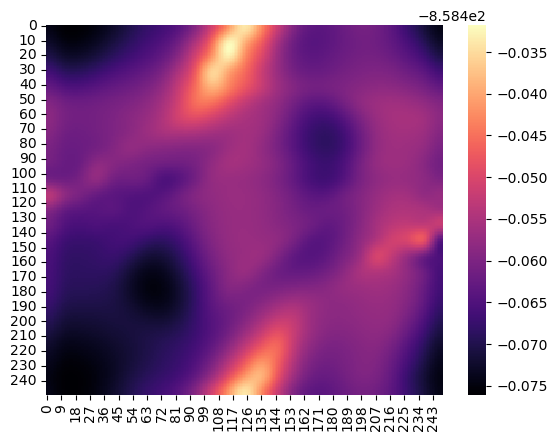

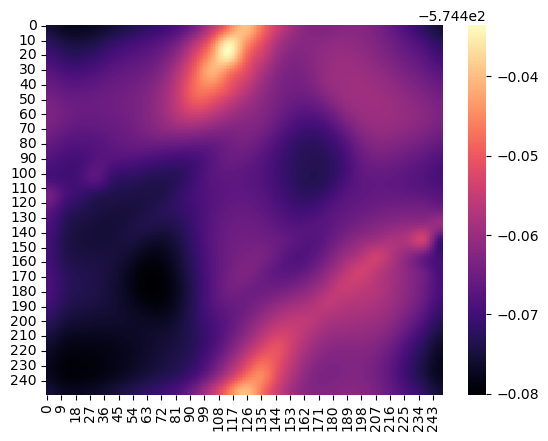

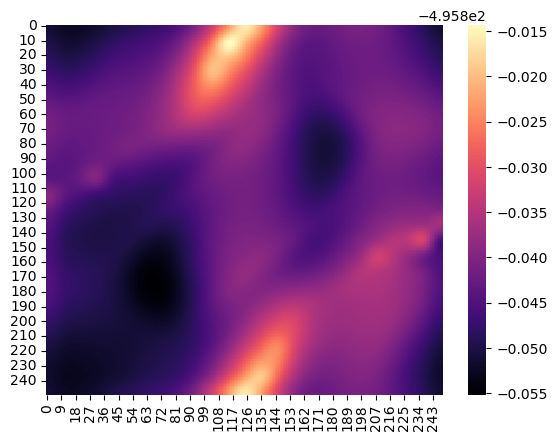

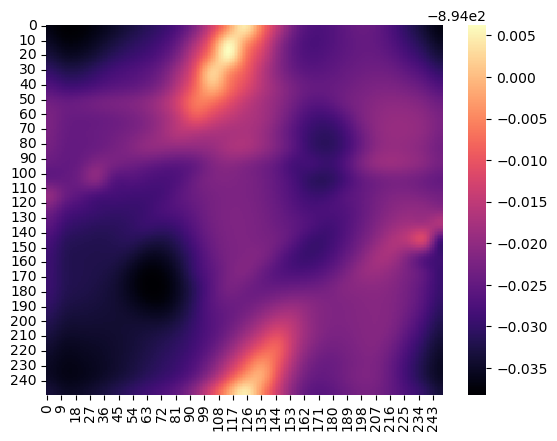

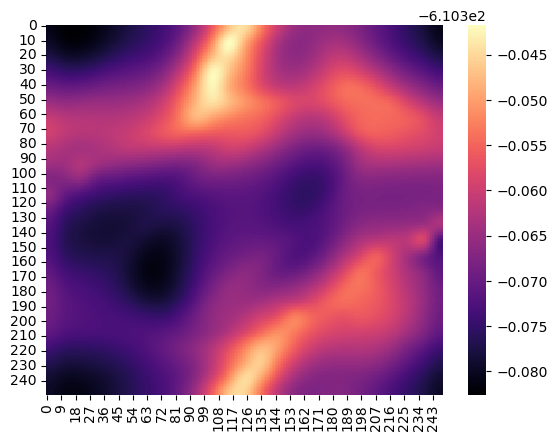

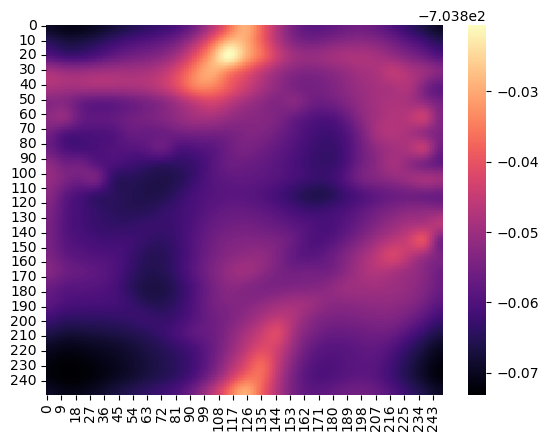

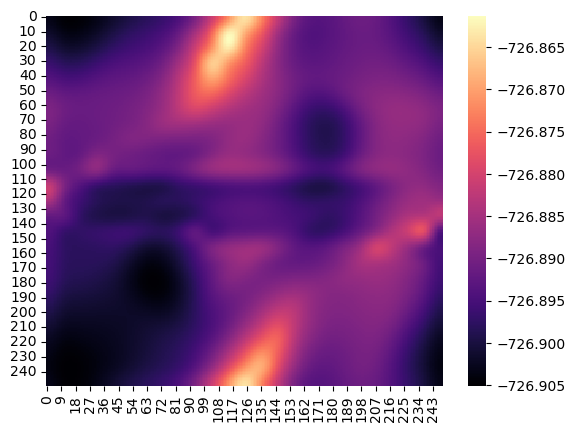

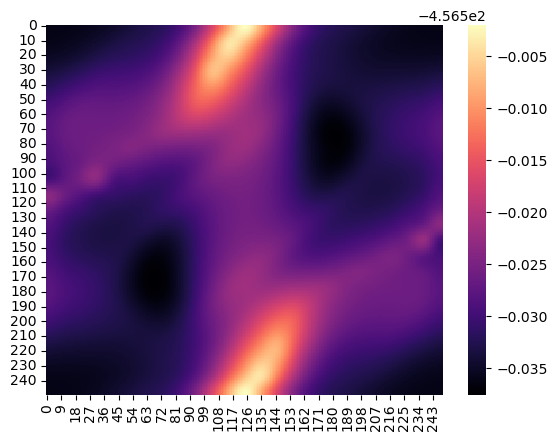

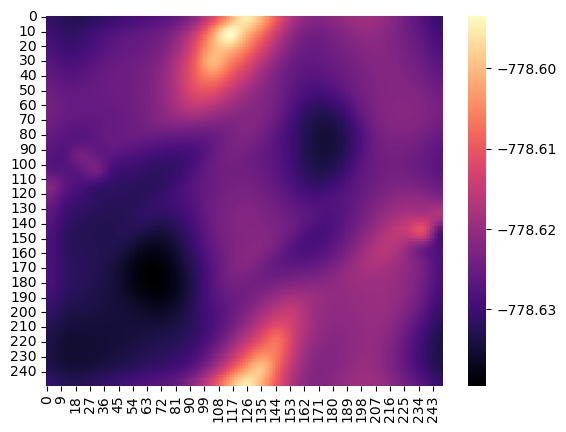

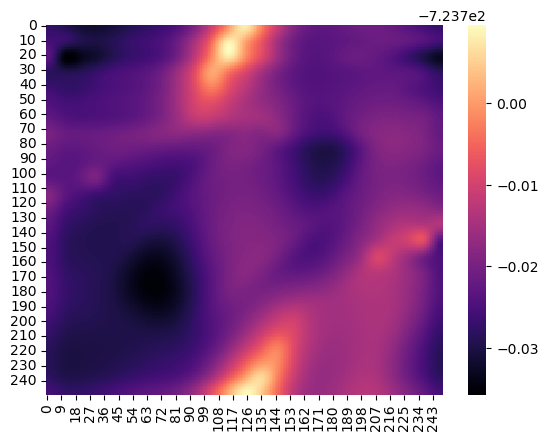

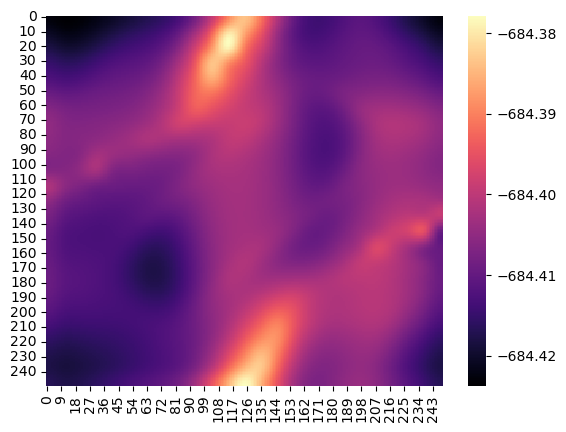

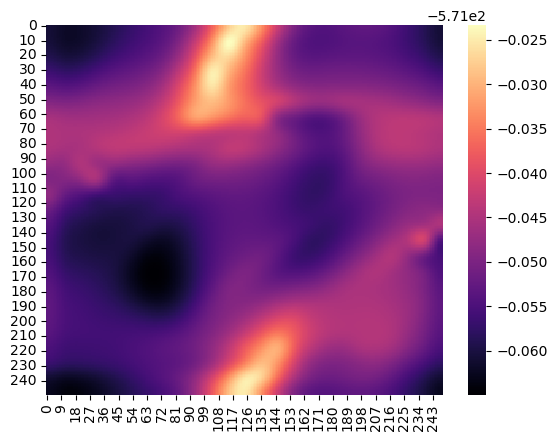

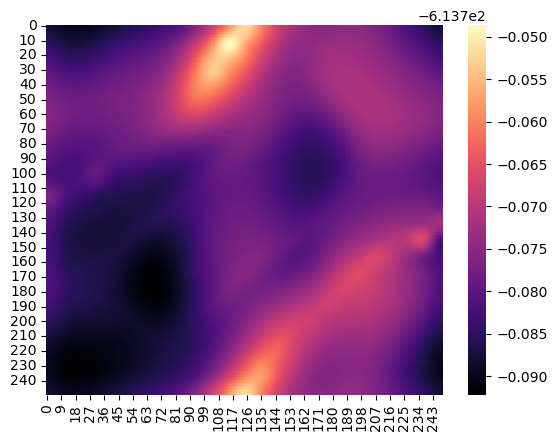

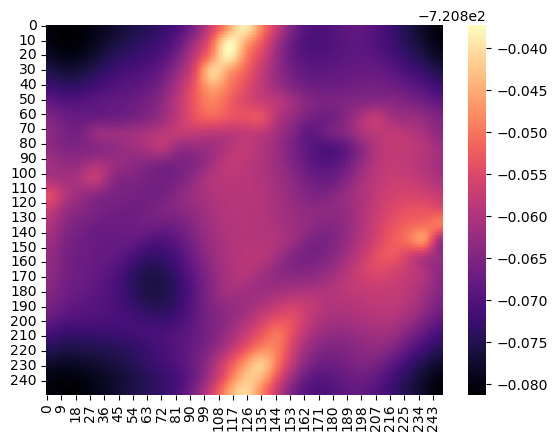

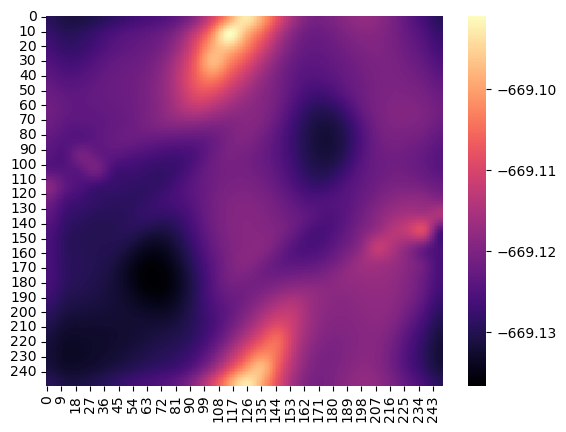

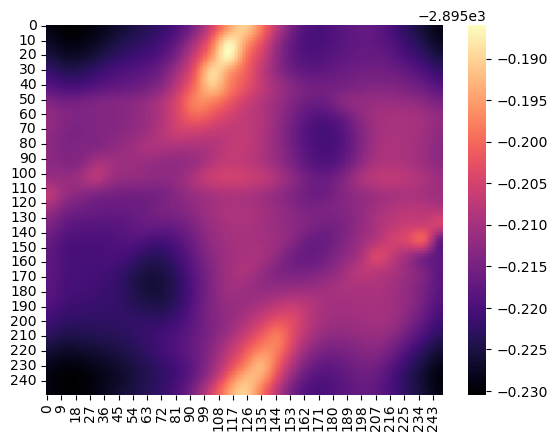

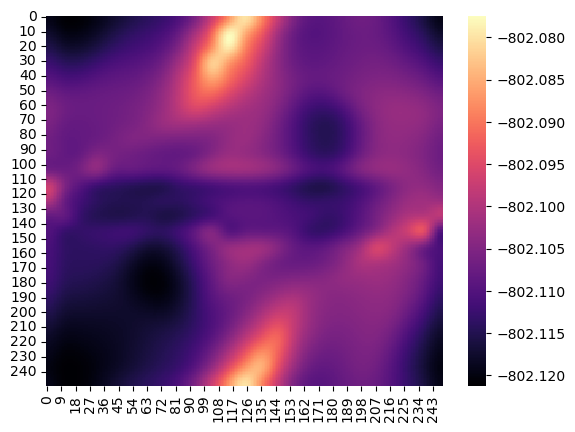

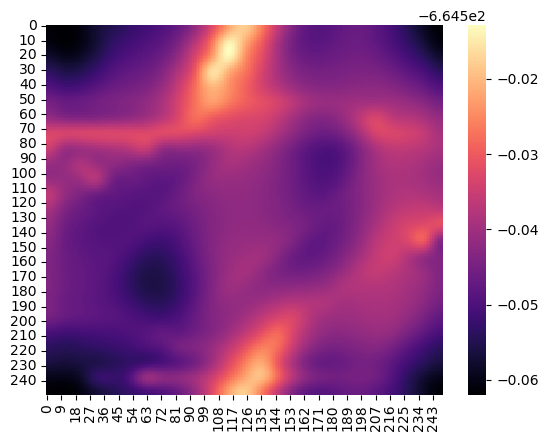

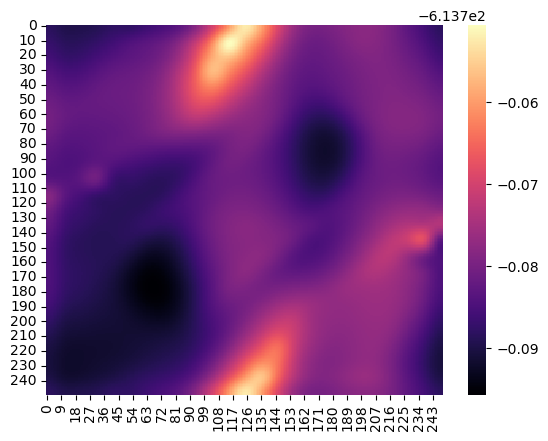

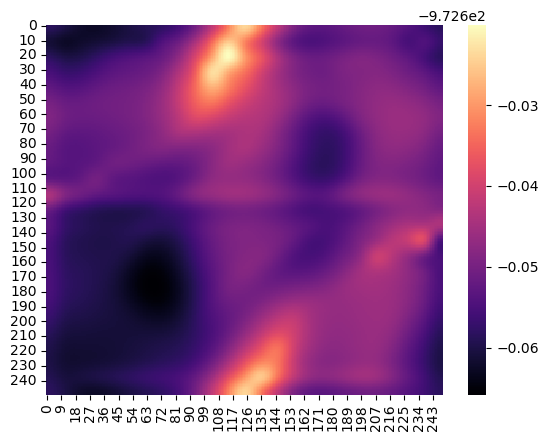

In [55]:
csv_files = get_csv(folder_path)  # obtain necessary csv files
csv_to_3d_matrices = csv_to_3d_matrix(folder_path, csv_files)   # convert csv files to matrix z = f(x,y)
# interpolated_matrices = [interpolate_matrix(matrix=matrix, scale_factor=10) for matrix in csv_to_3d_matrices]   # interpolate the matrices
plotted_heatmaps = plot_heatmap(csv_to_3d_matrices)